# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from IPython.display import Image
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [3]:
df = pd.read_csv('human_body_temperature.csv')

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [6]:
df.shape

(130, 3)

In [7]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### 1) Is the distribution of body temperatures normal? 
    - I will first try to look into graphical methods to detremaine if body temperature is normally distributed, then will use normality tests.

In [13]:
#Getting the mean and standard deviation of body temperature
temp_mean = np.mean(df['temperature'])
temp_sd = np.std(df['temperature'])

#Getting 10000 normal random samples of body temperature using the mean and standard deviation calculated above.
temp_rand = np.random.normal(temp_mean, temp_sd, 10000)

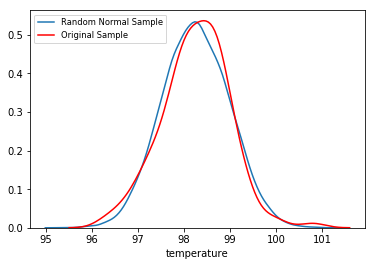

In [31]:
l1 = sns.distplot(temp_rand, hist=False, label = 'Random Normal Sample') #randomly generated data histogram
l2 = sns.distplot(df['temperature'], hist=False, color='red', label = 'Original Sample') #original sample
plt.legend(loc = 'upper left', fontsize='small')
plt.show()

- The body temperature data is almost normally distributed, However lets try to use normality tests to check normal distribution of body temperature data.

#### Normality test using Shapiro–Wilk test:
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value.

Null hypothesis: Data has Gaussian distribution (Normally distributed).

Alternative hypothesis: Data is not normally distributed.

In [34]:
# normality test
stat, p = shapiro(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.987, p=0.233


In [35]:
# interpretation of normality test
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)


- As per the Shapiro-Wilk test , the body temperature data is normally distributed.

### 2) Is the sample size large? Are the observations independent? 

In [37]:
df.shape

(130, 3)

- The central limit theorem states that if sample size are large enough, the distribution will be approximately normal. The general rule of n≥30 applies.


- As the number of samples in the data set are 130, the sample is large enough.

- The observations are that of temperature and heart rate of a particular person. It can be safely assumed that the measurements of temperature and heartbeat for one person is not affected by the measurements of another person. Furhtermore, we have already discovered that the sampled distrbution is normal and this led us to conclude that the distribution is a good representation of the population.

Conclusions:

- The sample size is large enough. We can apply z-statistics for hypothesis testing.

- The samples are statistically independent

### 3) Is the true population mean really 98.6 degrees F? 

In [44]:
# 1. bootstrap hypothesis test.
# Null hypothesis: True population mean is 98.6 degrees F.
# Alternative hypothesis: True population mean is not 98.6 degrees F.

mean_normal = 98.6

In [45]:
#shifting the sample as per the normal mean
temp_shifted = df['temperature'] - np.mean(df['temperature']) + mean_normal

In [48]:
#Calculating the test statistic
def diff_from_normal (data, normal_value= 98.6):
    return np.mean(data)-normal_value

observed_diff = diff_from_normal(df['temperature']) 
observed_diff

-0.35076923076921673

In [49]:
#Generating bootstrap replicates
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

In [54]:
bs_replicates = draw_bs_reps(temp_shifted, diff_from_normal, 10000)

In [55]:
p_value = np.sum(bs_replicates <= observed_diff)/10000
p_value

0.0

The p-value obtained is extremely small. If the null hypothesis was indeed true, the p-value would have been much greater. We can thus safely disregard the null hypothesis.

The true population mean is NOT 98.6F.

- We used the one-sample test for this problem. This is because we were comparing the sample mean to a known value (98.6) and trying to find out if the true mean temperature of humans is actually 98.6F.

- In this situation, it is more appropriate to use z-statistic. This is because the sample size is greater than 30, thus satisfying the conditions for applying Central Limit Theorem.

In [72]:
# Z test
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])
std_error = sigma/np.sqrt(len(df))
z = (mean_normal-mu)/std_error
z

5.475925202078116

In [73]:
p = (1-stats.norm.cdf(z))*2
p

4.352315174926957e-08

#### Conclusions:

- The p-value is extremely small. Therefore, we can reject the null hypothesis.
- The sample size is greater than 30. Hence, using the z-statistic is more appropriate.
- We are comparing the sample mean to known value of population mean. Hence, the one sample test is more appropriate.
- We are interested in knowing if the p-value on both sides of the tail. Therefore, we use the two-tailed test.

In [65]:
#t test
t = z
t

5.475925202078116

In [66]:
(1 - stats.t.cdf(t, len(df)-1))*2

2.1887464640713006e-07

The p-value obtained by applying the t-statistic is also extremely small. Hence, the null hypothesis is rejected even in this case and all the conclusions arrived at using z-statistics hold.

The result is the same because for sample sizes greater than 30, the z-statistic and the t-statistic yield approximately the same results.

#### Conclusions:
- The p-value for the t-statistic is ten times larger than the p-value of the z-statisitc.
- However, it is still extremely small. Therefore, we can safely reject the null hypothesis.
- All the conclusions arrived at with z-statistics also hold with the t-statistics.

### 4) Draw a small sample of size 10 from the data and repeat both frequentist tests. 

- Which one is the correct one to use? 
- What do you notice? What does this tell you about the difference in application of the t and z statistic? 


In [68]:
df_10 = df[:10]

- As the sample size is less than 10 t stastic is the best statistic

In [79]:
df_10_mu = np.mean(df_10.temperature)
df_10_sigma = np.std(df_10.temperature)
df_10_stderror = df_10_sigma/np.sqrt(len(df_10))

df_10_mu, df_10_sigma, df_10_stderror

(98.57, 0.517783738639985, 0.16373759494996873)

In [83]:
z = (mean_normal-df_10_mu)/df_10_stderror
z

0.18321998688919222

In [84]:
p = (1-stats.norm.cdf(z))*2
p

0.8546254125448767

In [85]:
#t test
t = z
t

0.18321998688919222

In [86]:
(1 - stats.t.cdf(t, len(df)-1))*2

0.8549130717040401

When the sample size is reduced to 10, p value significantly in both z test and t test, so we fail to reject the null hypothesis.

The true population mean is 98.6F.


### 5. At what temperature should we consider someone's temperature to be "abnormal"? 
- As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
- Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 


Let us first calculate the true mean of human temperature with a confidence interval of 97.5%. Since, we've already calculated the sample mean, sample standard deviation and sigma_x, this step should be fairly straightforward.

In [87]:
z0 = stats.norm.ppf(0.975)

upper_temp = mu + z0*std_error
lower_temp = mu - z0*std_error

lower_temp, upper_temp

(98.12368211145665, 98.37477942700491)

From the above results, we are 95% confident that the true mean is somewhere between 98.123F and 98.375F. The margin of error is 10%. Therefore, we can consider any temperature outside this range to be abnormal.

#### Conclusion
- A body temperature below 98.123 and above 98.375 should be considered abnormal.

### 6. Is there a significant difference between males and females in normal temperature?
• What testing approach did you use and why? 

• Write a story with your conclusion in the context of the original problem. 


- The task is to check if the mean normal temperature of male and female population are significanlty different. For this we use two-sample t procedure

In [88]:
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

len(df_male), len(df_female)

(65, 65)

In [89]:
male_mean = np.mean(df_male.temperature)
female_mean = np.mean(df_female.temperature)
male_std = np.std(df_male.temperature)
female_std = np.std(df_female.temperature)

In [90]:
mean_diff = female_mean-male_mean
sigma_diff = np.sqrt((female_std**2)/len(df_female)  + (male_std**2)/len(df_male))
mean_diff, sigma_diff

(0.289230769230727, 0.12557668521231213)

In [92]:
z = (mean_diff ) / sigma_diff
z

2.3032202891940123

In [93]:
p = (1-stats.norm.cdf(z))*2
p

0.021266451830129318

The p-value obtained in this case is 0.02 which is less than the accepted threshold of 0.05.

Therefore, we have to reject the null hypothesis and accept the alternate hypothesis. In other words, there is a significant difference in male and female body temperatures.

For this test, two-sample test was used as we were trying to compare the means of two different groups. Also, the z-statistic was used as the sample sizes for both groups were greater than 30.

#### Conclusions:
- The distribution of human temperatures is normal and can be modeled as a Gaussian distribution.
- The human temperatures are statistically independent.
- We are reasonably confident that the mean temperature of the human body is not 98.6F. This is done by hypothesis testing and calculating the corresponding z-statistic.
- The z-statistic and t-statsitic yield similar results for sample sizes greater than 30.
- Male and female body temperatures differ significantly to be of statistical importance.